In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["DTD","SVHN","Caltech256","SUN397","iWildCam","iWildCamID","CIFAR10","CINIC10"] # "EuroSAT","GTSRB","MNIST"
nbn = "02_" # Notebook Number; Prefix for artifacts path

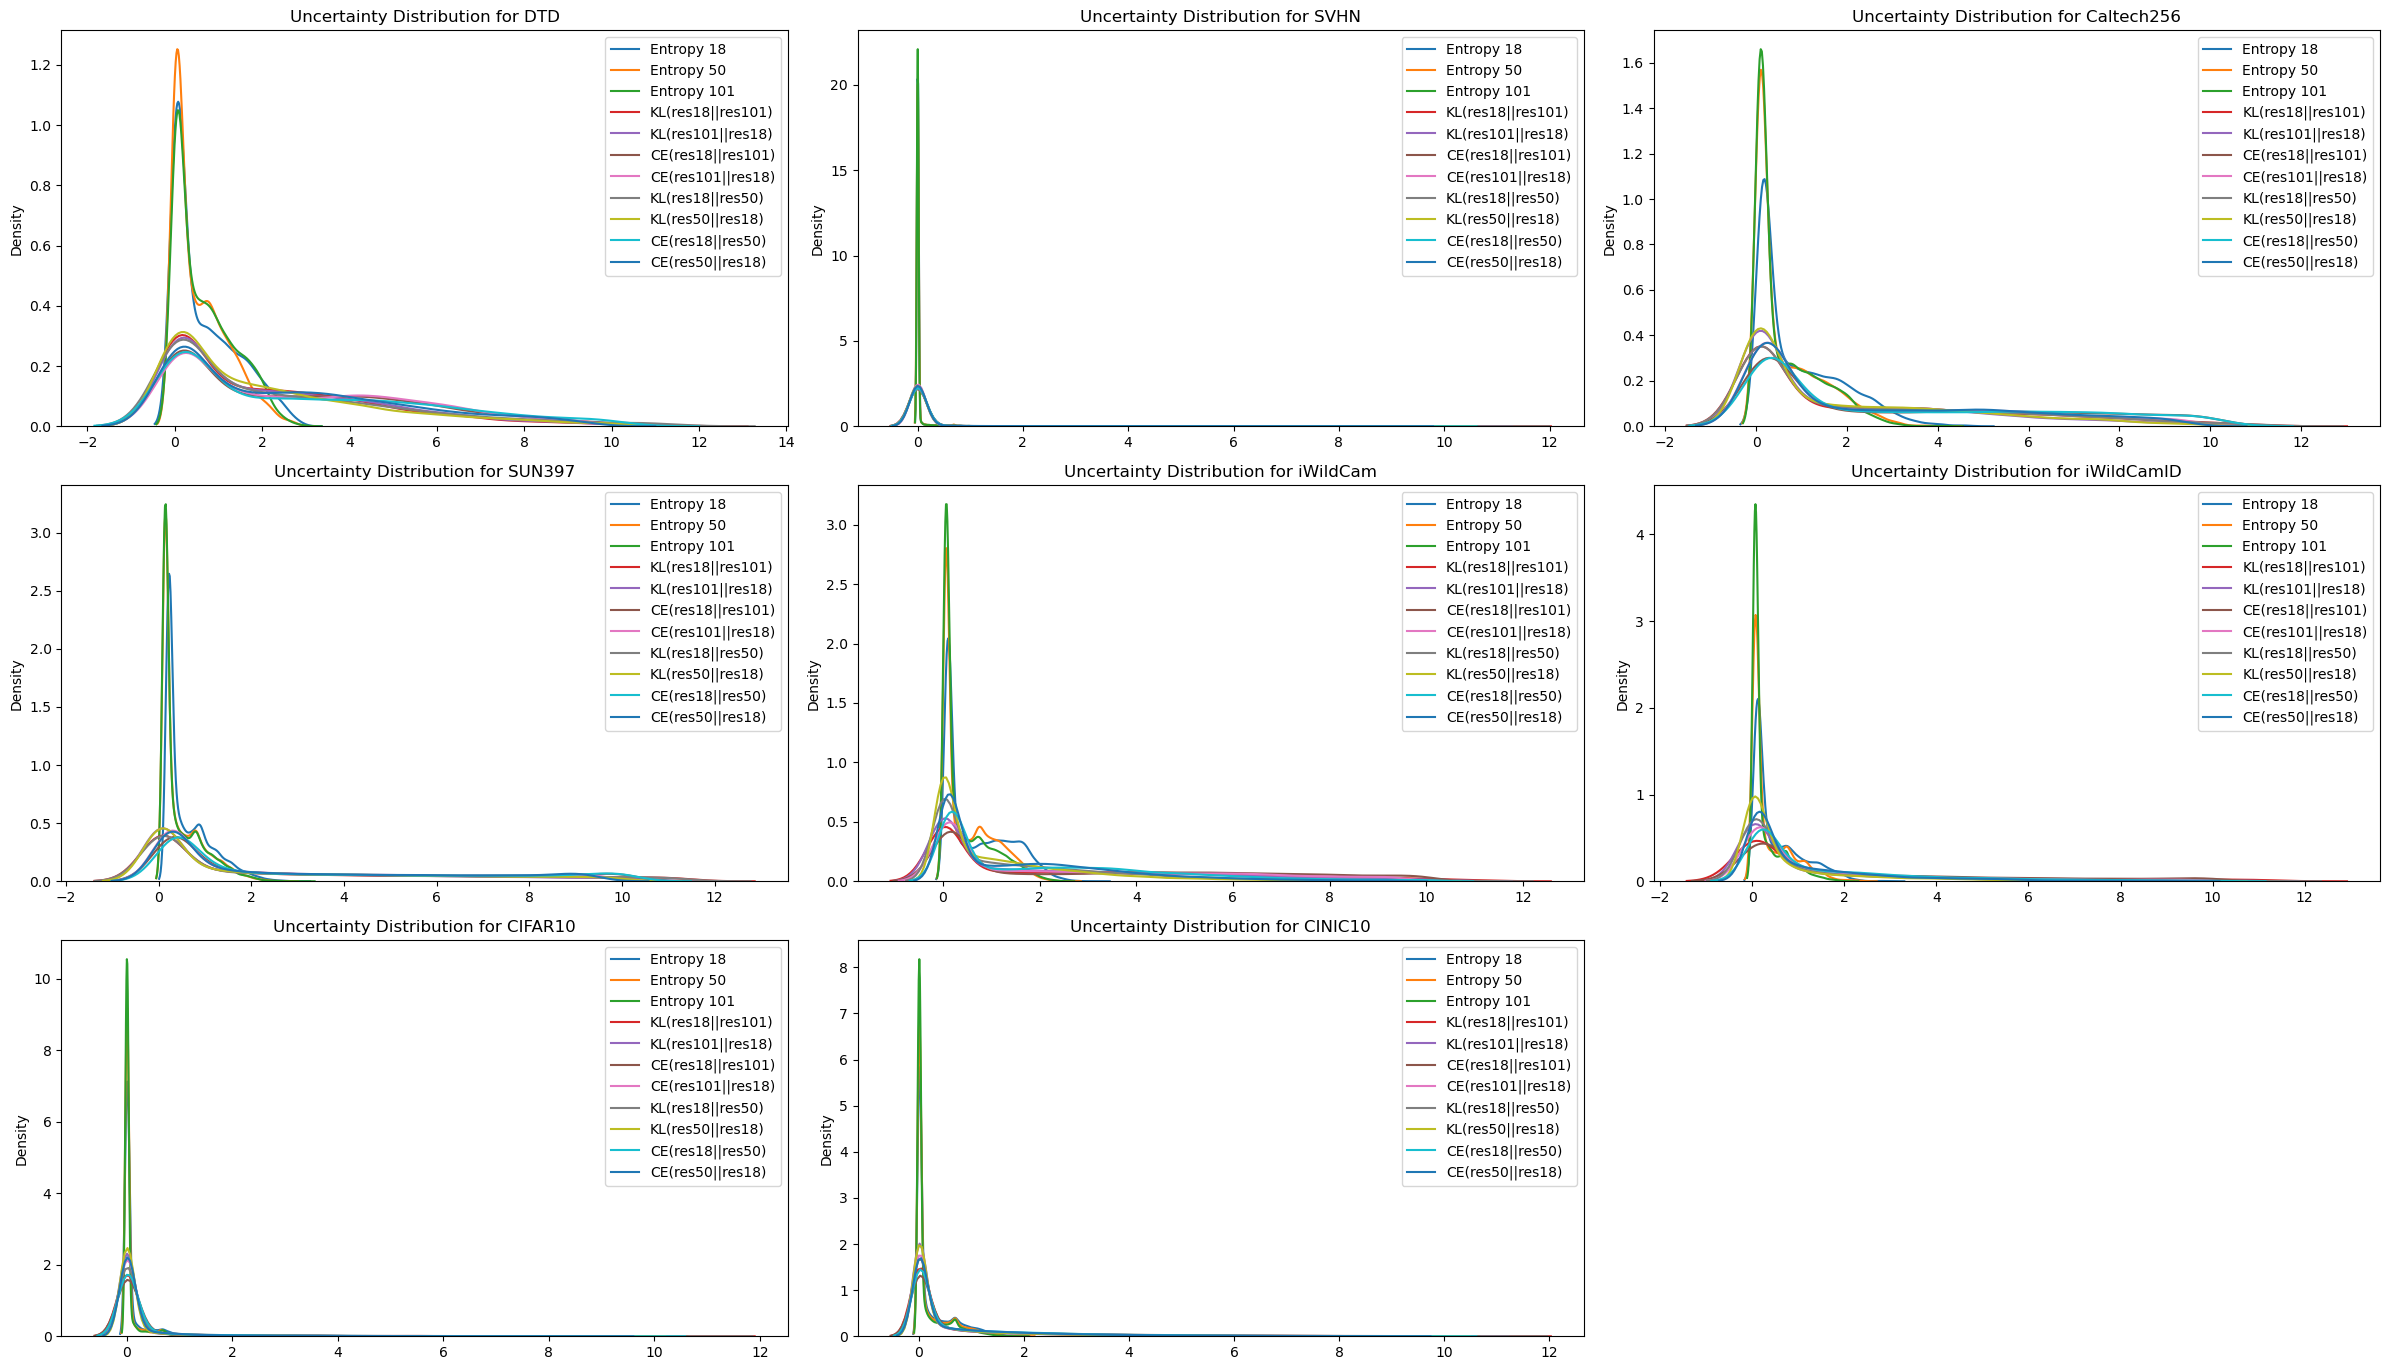

In [7]:
nrows = 3
ncols = 3

pred_prefix = "csv/prediction_"
unc_prefix = "csv/uncertainty_"

fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(unc_pred["ent_18"], label='Entropy 18', ax=ax)
    sns.kdeplot(unc_pred["ent_50"], label='Entropy 50', ax=ax)
    sns.kdeplot(unc_pred["ent_101"], label='Entropy 101', ax=ax)
    sns.kdeplot(unc_pred["kl_18_101"], label='KL(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["kl_101_18"], label='KL(res101||res18)', ax=ax)
    sns.kdeplot(unc_pred["ce_18_101"], label='CE(res18||res101)', ax=ax)
    sns.kdeplot(unc_pred["ce_101_18"], label='CE(res101||res18)', ax=ax)
    sns.kdeplot(unc_pred["kl_18_50"], label='KL(res18||res50)', ax=ax)
    sns.kdeplot(unc_pred["kl_50_18"], label='KL(res50||res18)', ax=ax)
    sns.kdeplot(unc_pred["ce_18_50"], label='CE(res18||res50)', ax=ax)
    sns.kdeplot(unc_pred["ce_50_18"], label='CE(res50||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f"artifacts/{nbn}uncertainty_distributions.png")

plt.show()

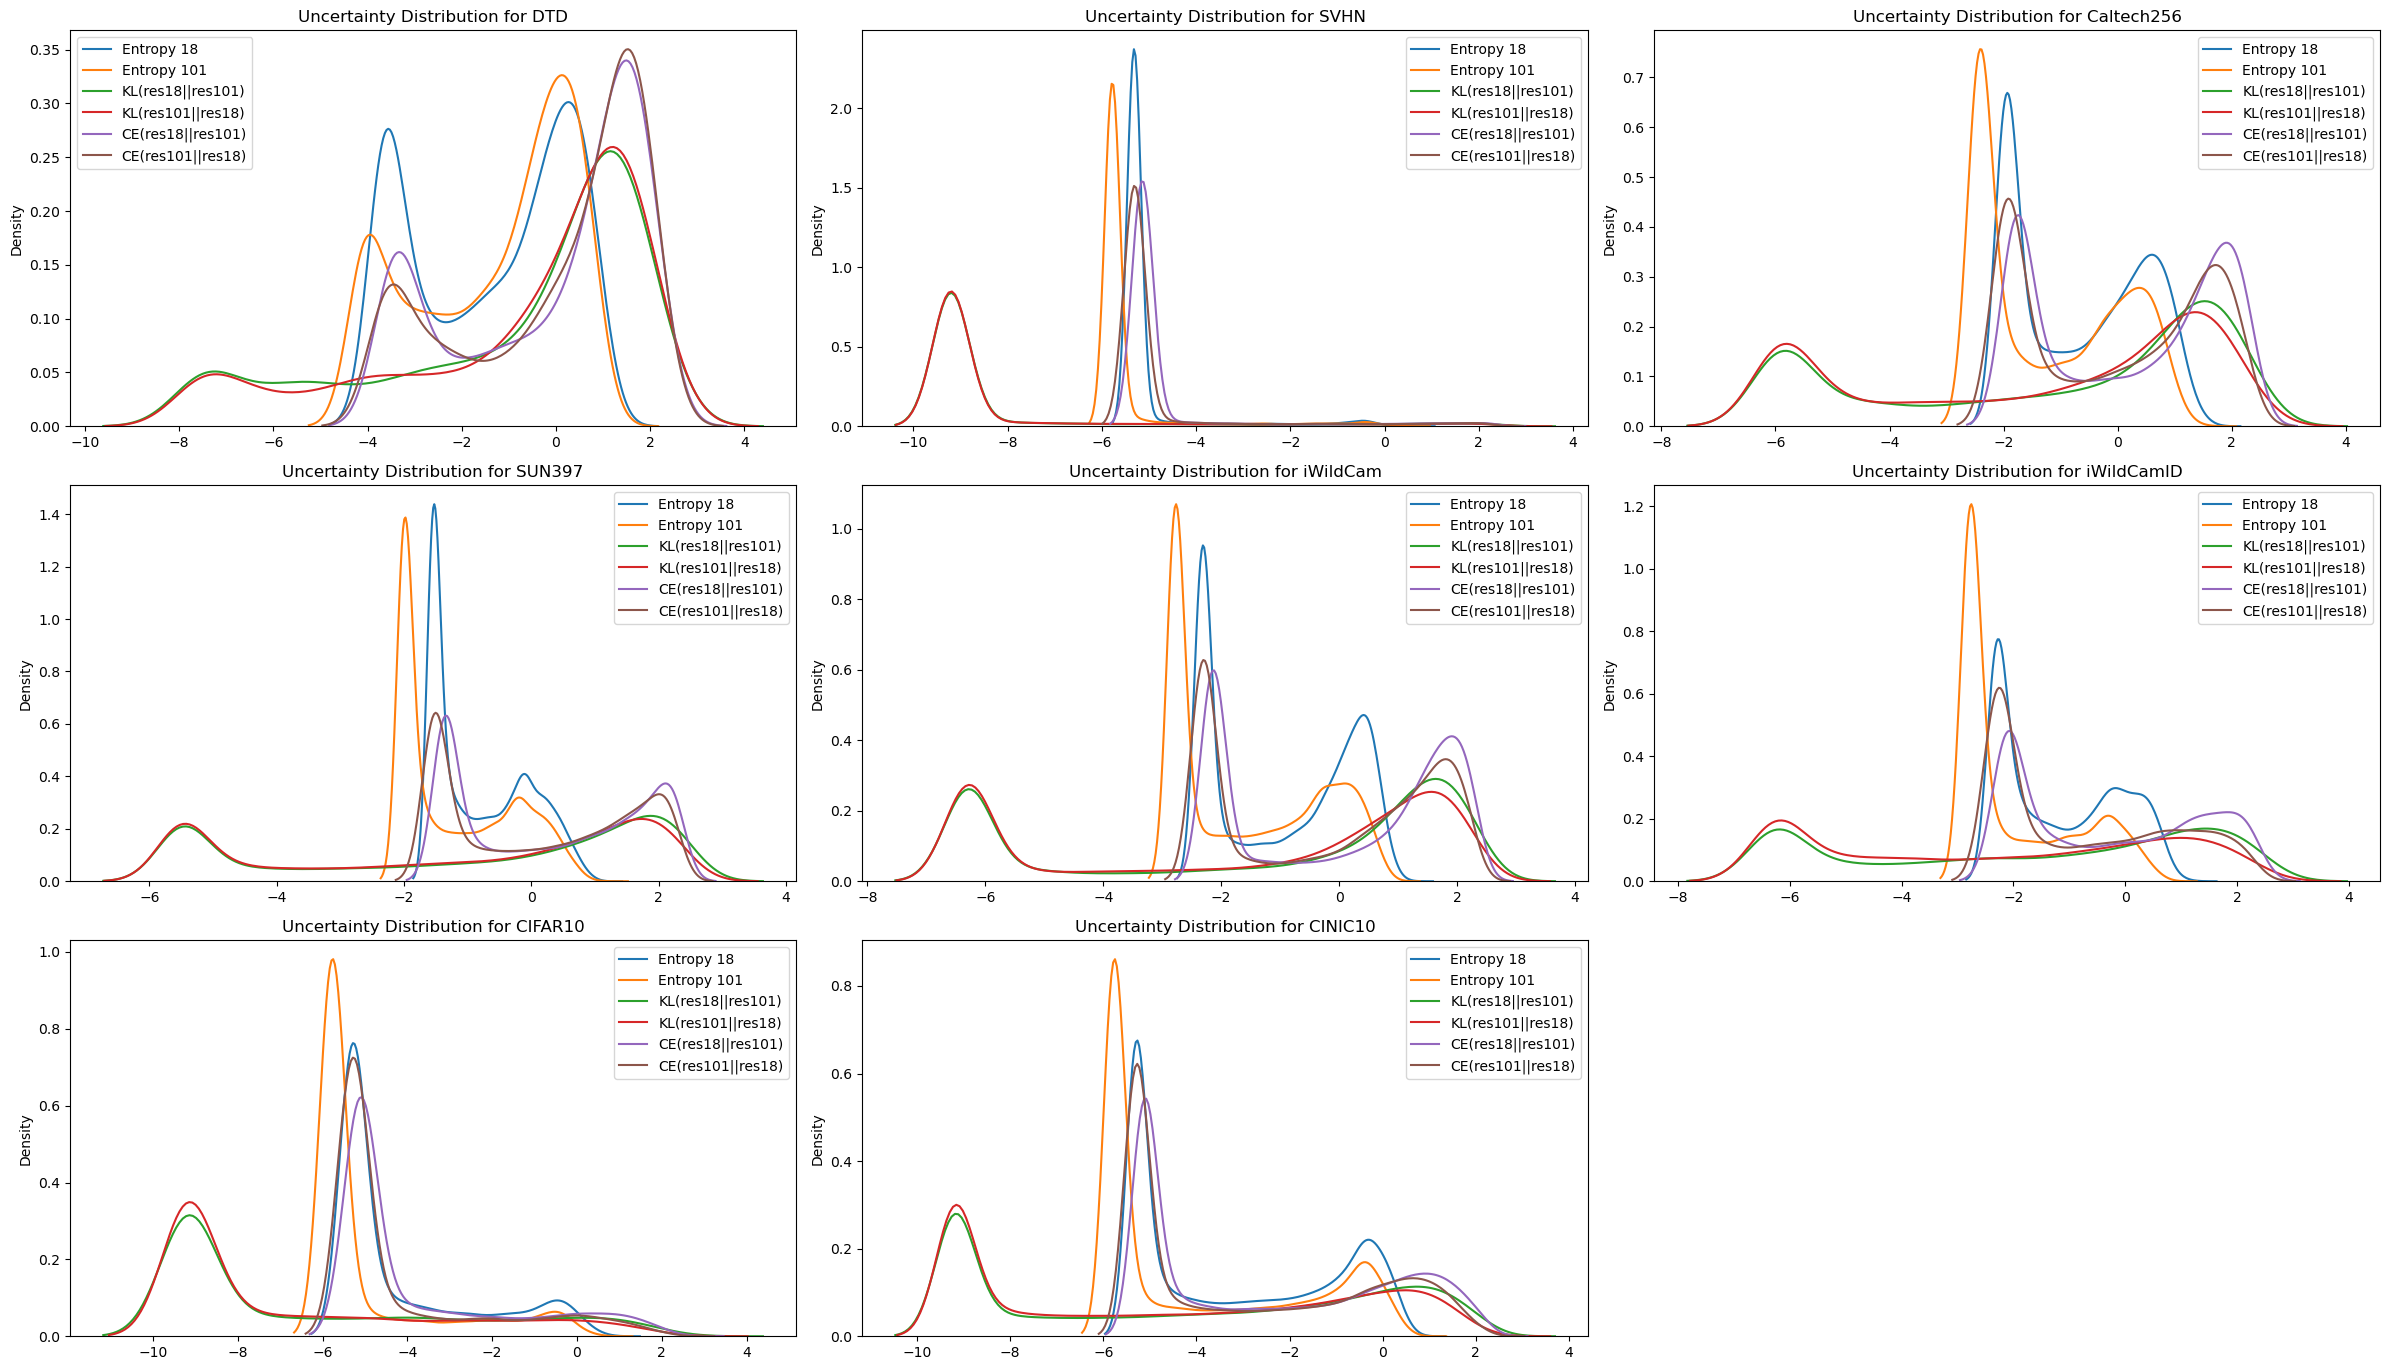

In [8]:
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))
for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(np.log(unc_pred["ent_18"]), label='Entropy 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["ent_101"]), label='Entropy 101', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_18_101"]), label='KL(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["kl_101_18"]), label='KL(res101||res18)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_18_101"]), label='CE(res18||res101)', ax=ax)
    sns.kdeplot(np.log(unc_pred["ce_101_18"]), label='CE(res101||res18)', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(f"artifacts/{nbn}log_uncertainty_distributions.png")

plt.show()

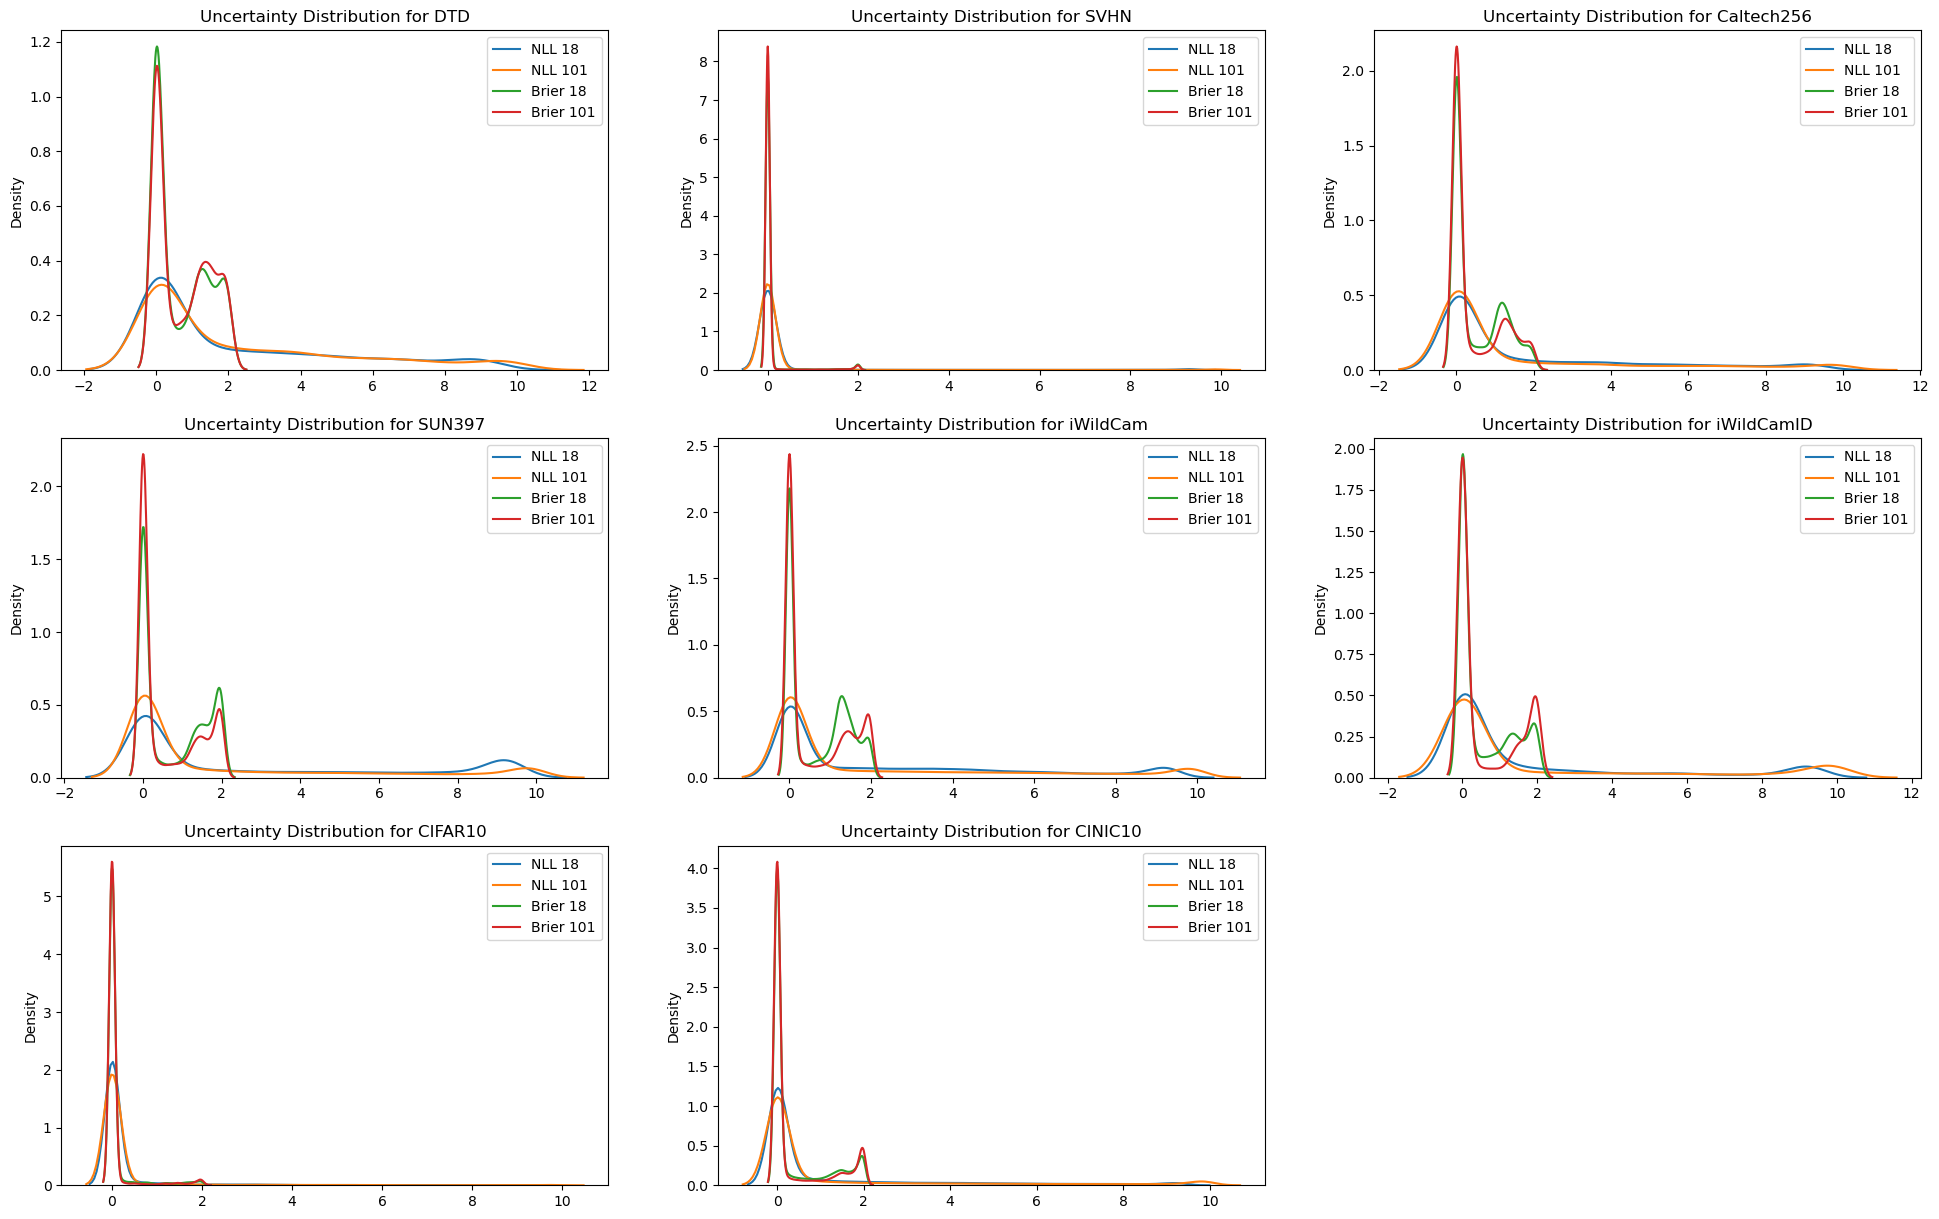

In [9]:
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(unc_pred["nll_18"], label='NLL 18', ax=ax)
    sns.kdeplot(unc_pred["nll_101"], label='NLL 101', ax=ax)
    sns.kdeplot(unc_pred["brier_18"], label='Brier 18', ax=ax)
    sns.kdeplot(unc_pred["brier_101"], label='Brier 101', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.savefig(f"artifacts/{nbn}nll_brier_distributions.png")

plt.show()

/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/tim

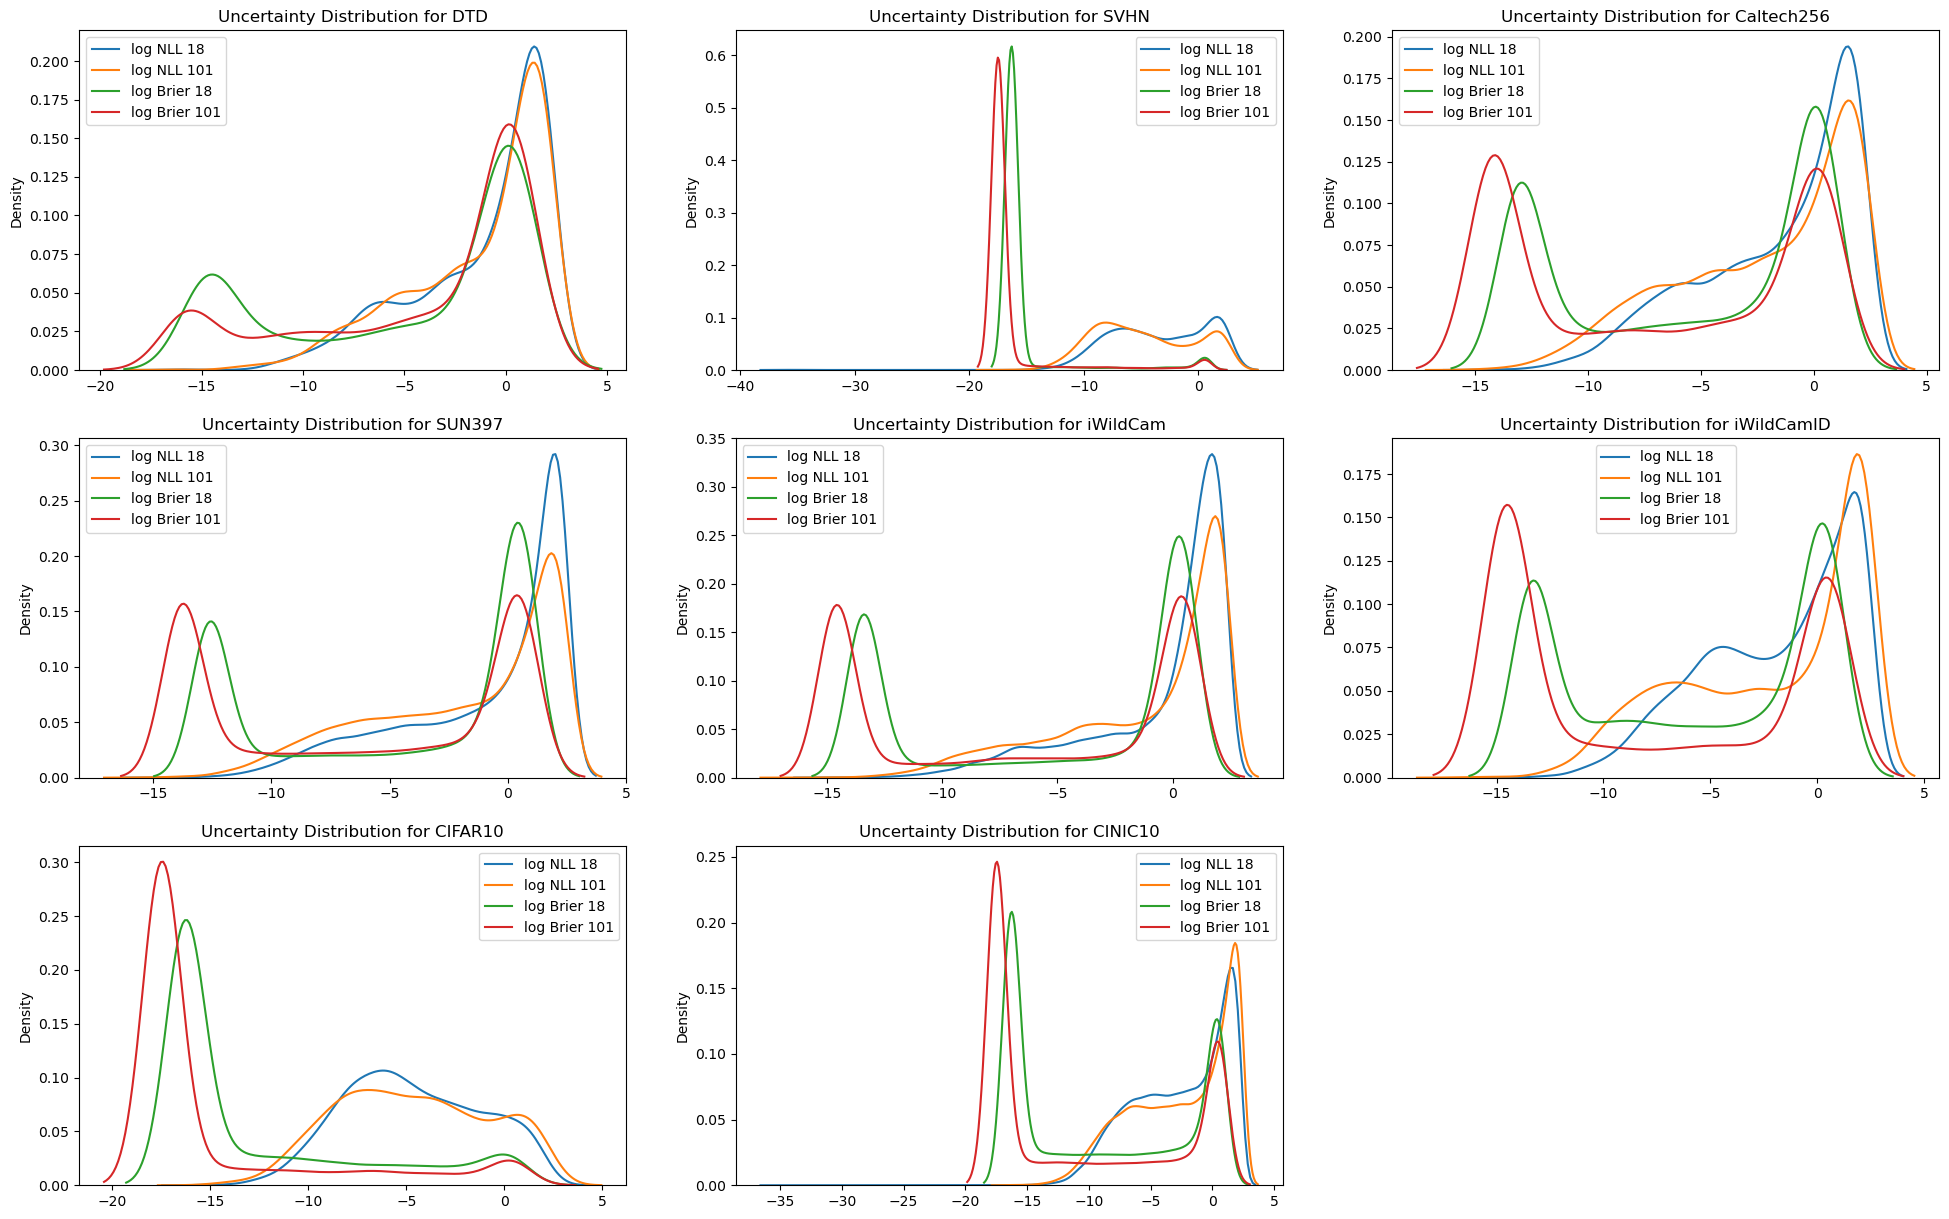

In [10]:
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
    ax = axes[i // ncols, i % ncols]

    sns.kdeplot(np.log(unc_pred["nll_18"]), label='log NLL 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["nll_101"]), label='log NLL 101', ax=ax)
    sns.kdeplot(np.log(unc_pred["brier_18"]), label='log Brier 18', ax=ax)
    sns.kdeplot(np.log(unc_pred["brier_101"]), label='log Brier 101', ax=ax)

    ax.set_title(f'Uncertainty Distribution for {ds}')
    ax.set_xlabel("")
    ax.set_ylabel('Density')
    ax.legend()


for j in range(len(datasets), nrows * ncols):
    fig.delaxes(axes[j // ncols, j % ncols])

plt.savefig(f"artifacts/{nbn}log_nll_brier_distributions.png")

plt.show()